In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Import Training and Testing Data

In [2]:
train=pd.read_csv('SalaryData_Train.csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train.shape

(30161, 14)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [8]:
test=pd.read_csv('SalaryData_Test.csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
test.shape

(15060, 14)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


## Data Visualization

<Axes: >

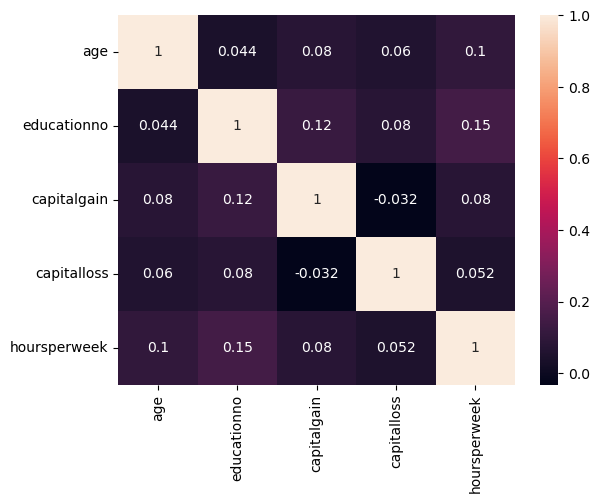

In [14]:
sns.heatmap(train.corr(),annot=True)

<Axes: >

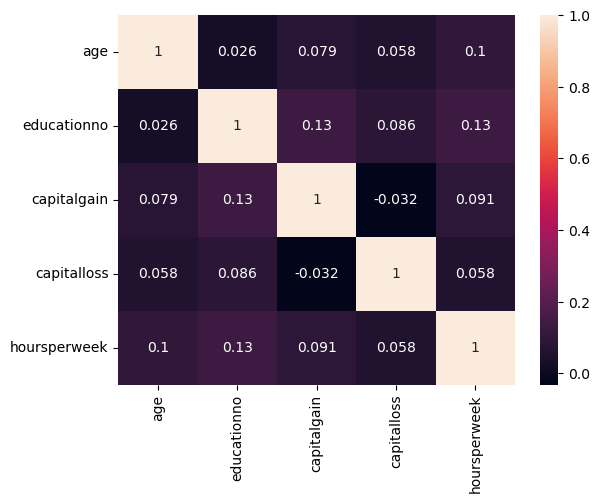

In [15]:
sns.heatmap(test.corr(),annot=True)

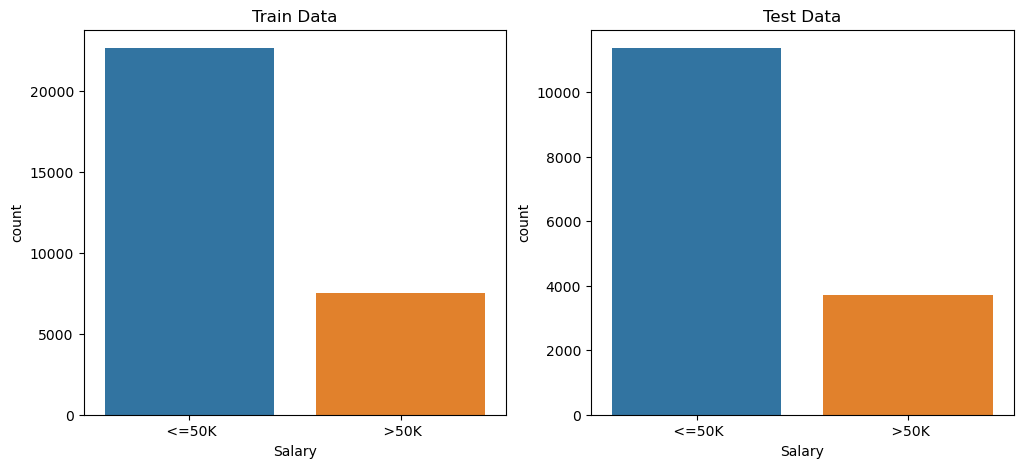

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='Salary',data=train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.title('Train Data')
plt.subplot(122)
sns.countplot(x='Salary',data=test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.title('Test Data')
plt.show()

Text(0.5, 1.0, 'Test Data')

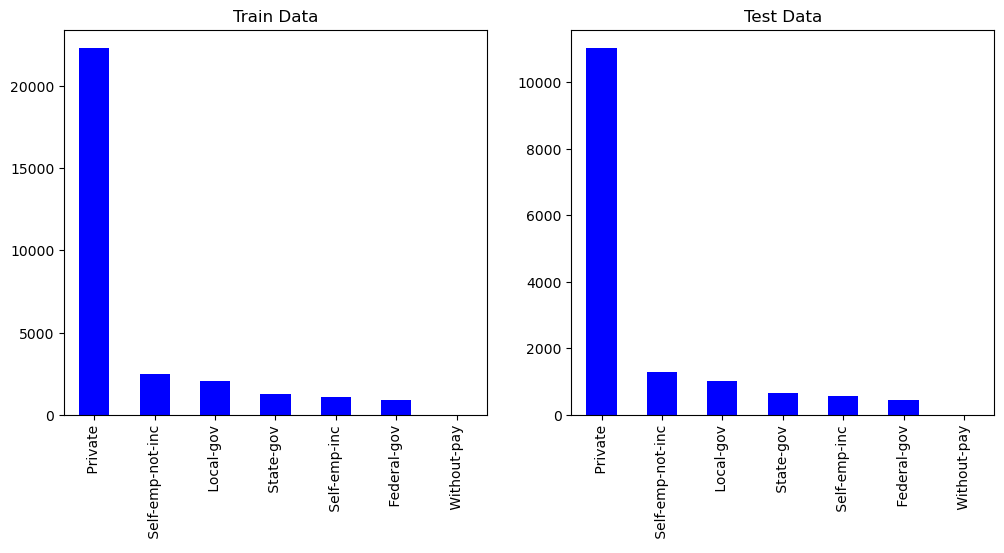

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train.workclass.value_counts().plot.bar(color='blue')
plt.title('Train Data')
plt.subplot(122)
test.workclass.value_counts().plot.bar(color='blue')
plt.title('Test Data')

Text(0.5, 1.0, 'Test Data')

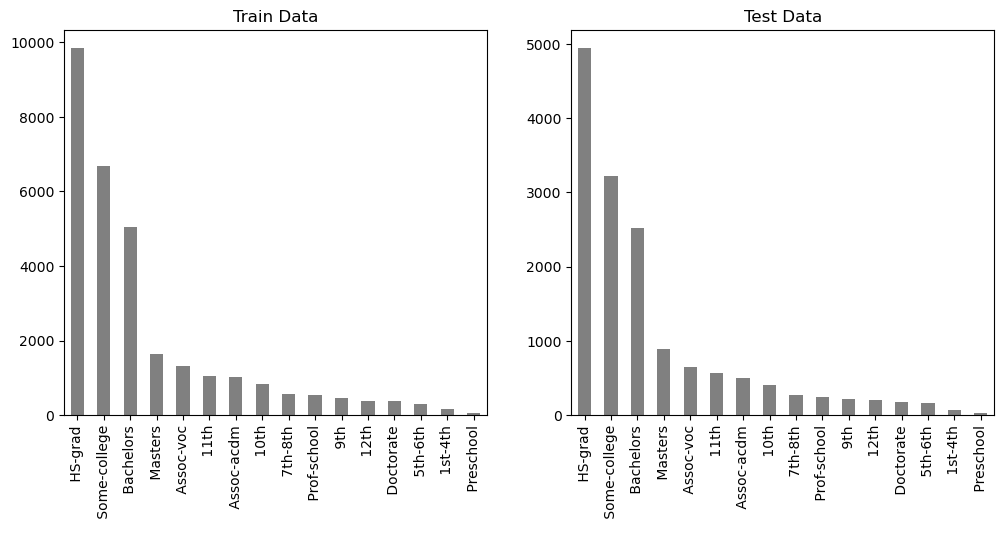

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train.education.value_counts().plot.bar(color='grey')
plt.title('Train Data')
plt.subplot(122)
test.education.value_counts().plot.bar(color='grey')
plt.title('Test Data')

Text(0.5, 1.0, 'Test Data')

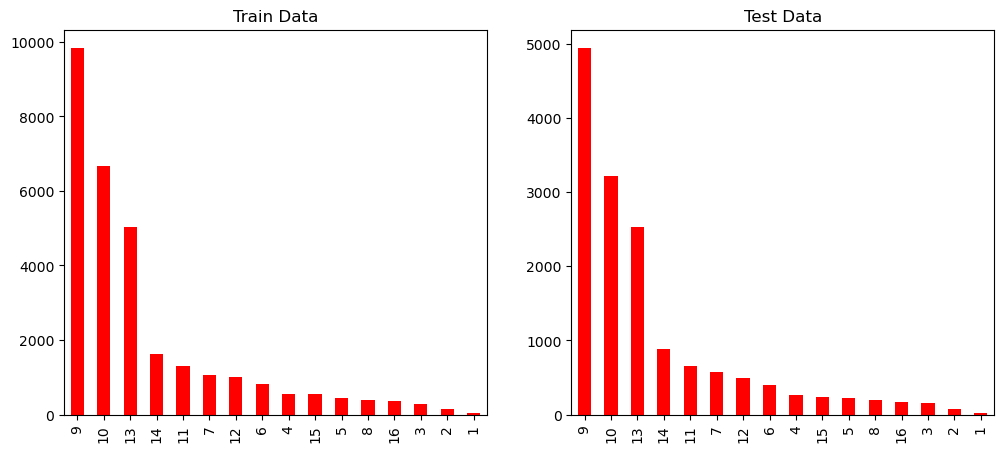

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train.educationno.value_counts().plot.bar(color='red')
plt.title('Train Data')
plt.subplot(122)
test.educationno.value_counts().plot.bar(color='red')
plt.title('Test Data')


Text(0.5, 1.0, 'Test Data')

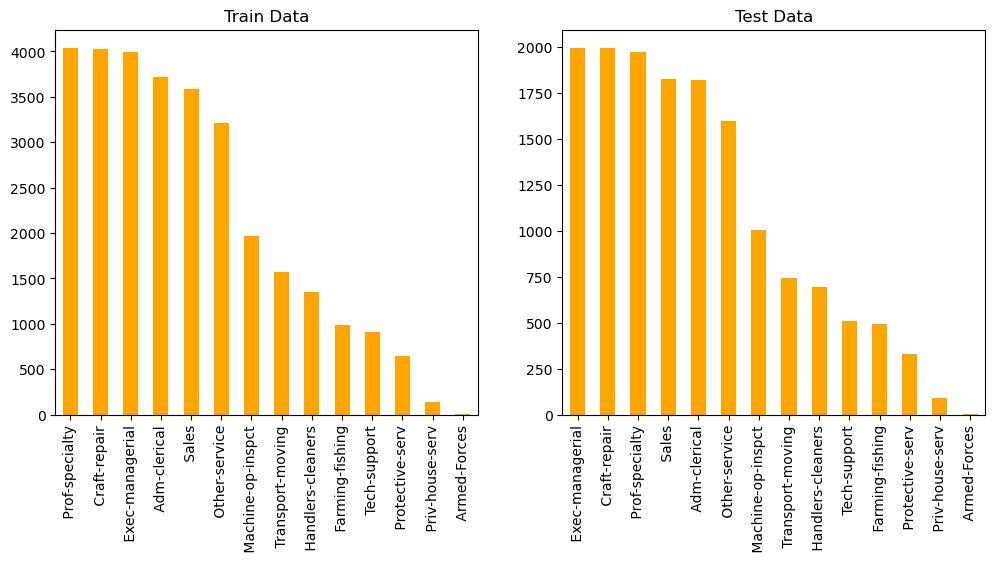

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train.occupation.value_counts().plot.bar(color='orange')
plt.title('Train Data')
plt.subplot(122)
test.occupation.value_counts().plot.bar(color='orange')
plt.title('Test Data')

Text(0.5, 1.0, 'Test Data')

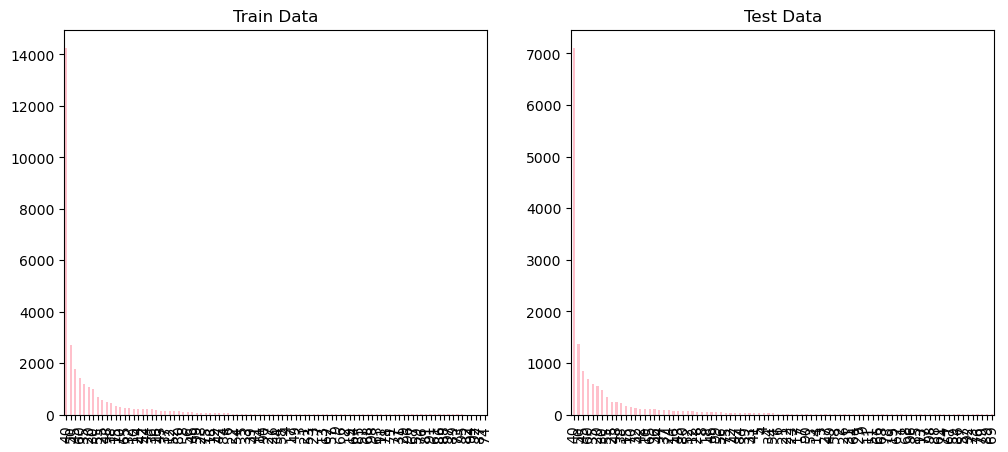

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train.hoursperweek.value_counts().plot.bar(color='pink')
plt.title('Train Data')
plt.subplot(122)
test.hoursperweek.value_counts().plot.bar(color='pink')
plt.title('Test Data')

Text(0.5, 1.0, 'Test Data')

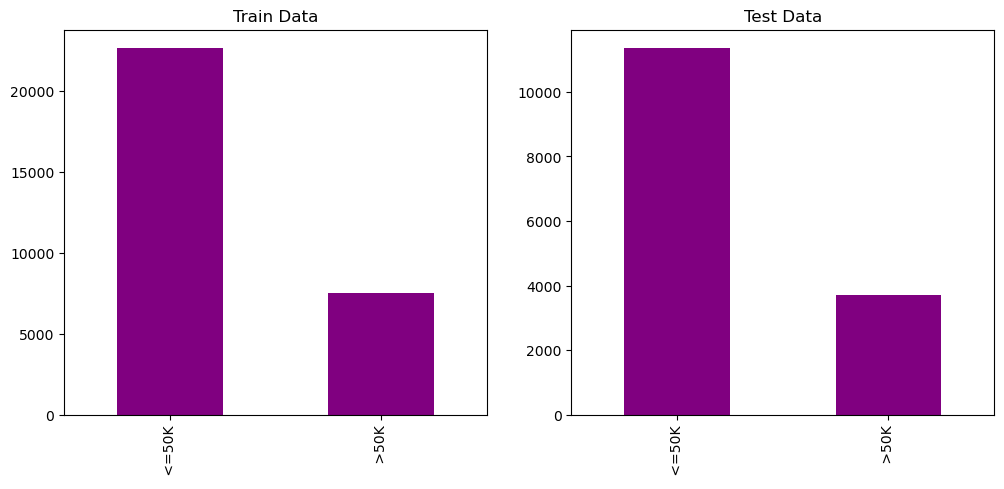

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train.Salary.value_counts().plot.bar(color='purple')
plt.title('Train Data')
plt.subplot(122)
test.Salary.value_counts().plot.bar(color='purple')
plt.title('Test Data')

## Label Encoding

In [23]:
colnames = test.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [24]:
le = LabelEncoder()
for i in colnames:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

## Import Training and Testing Data

In [25]:
xtrain = train[colnames[0:-1]].values
ytrain = train[colnames[-1]].values
xtest = test[colnames[0:-1]].values
ytest = test[colnames[-1]].values

## Building the model

### Grid Search CV

In [28]:
clf = SVC(kernel='rbf')
clf.fit(xtrain , ytrain)
ypred = clf.predict(xtest)
acc1 = accuracy_score(ytest, ypred) * 100
print(ypred[:5])
print("Accuracy =", acc1)
confusion_matrix(ytest, ypred)

[0 0 0 1 0]
Accuracy = 81.18193891102258


array([[11198,   162],
       [ 2672,  1028]], dtype=int64)

In [29]:
clf = SVC(kernel= "linear") 
clf.fit(xtrain , ytrain)
ypred = clf.predict(xtest)
acc2 = accuracy_score(ytest, ypred) * 100
print(ypred[:5])
print("Accuracy =", acc2)
confusion_matrix(ytest, ypred)    

[0 0 0 1 0]
Accuracy = 80.41832669322709


array([[11039,   321],
       [ 2628,  1072]], dtype=int64)

In [30]:
clf = SVC(kernel= "poly") 
clf.fit(xtrain , ytrain)
ypred = clf.predict(xtest)
acc3 = accuracy_score(ytest, ypred) * 100
print(ypred[:5])
print("Accuracy =", acc3)
confusion_matrix(ytest, ypred) 

[0 0 0 1 0]
Accuracy = 81.95219123505976


array([[11124,   236],
       [ 2482,  1218]], dtype=int64)

In [31]:
clf = SVC(kernel= "sigmoid") 
clf.fit(xtrain , ytrain)
ypred = clf.predict(xtest)
acc4 = accuracy_score(ytest, ypred) * 100
print(ypred[:5])
print("Accuracy =", acc4)
confusion_matrix(ytest, ypred) 

[1 0 0 0 1]
Accuracy = 59.16998671978752


array([[8341, 3019],
       [3130,  570]], dtype=int64)

In [32]:
# Accuracy comparision
comp = {"Kernel":pd.Series(['RBF','Linear','Poly','Sigmoid']),
        "Accuracy":pd.Series([acc1,acc2,acc3,acc4])}
t=pd.DataFrame(comp)
t 

,Kernel,Accuracy
0,RBF,81.181939
1,Linear,80.418327
2,Poly,81.952191
3,Sigmoid,59.169987


# Hence, we can say that the 'Poly Kernel' is best suitable in this case